## DataSet RealEstate

## Import Librairies

In [329]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


#### Read CSV file

In [330]:
df= pd.read_csv("./src/france_total_real_estate_sales.csv")


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_23140\2431485172.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("./src/france_total_real_estate_sales.csv")


View of existing columns :

In [331]:
df.columns

Index(['Date mutation', 'Nature mutation', 'Valeur fonciere', 'No voie',
       'Code voie', 'Code postal', 'Commune', 'Code departement',
       'Code commune', 'Section', 'No plan', 'Nombre de lots', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain',
       'Type_voie'],
      dtype='object')

##### Drop unused columns :

In [332]:
df.drop(columns=['No voie', 'Code voie','Section', 'No plan','Type_voie', 'Commune', 'Code postal'], inplace=True)
df.head(1)

,Date mutation,Nature mutation,Valeur fonciere,Code postal,Commune,Code departement,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,03/01/2022,Vente,"55000,00",1000.0,BOURG-EN-BRESSE,1,53,1,Appartement,24.0,1.0,NaN


##### Rename used columns

In [333]:
df.rename(columns={
    "Date mutation": "Date_transaction", 
    "Nature mutation": "Transaction", 
    "Valeur fonciere": "Valeur_fonciere", 
    "Code departement": "Code_dep",
    "Code commune": "Code_comm",
    "Nombre de lots": "Nb_lots",
    "Type local": "Type_local",
    "Surface reelle bati": "Surface_bat",
    "Nombre pieces principales": "Nb_pieces",
    "Surface terrain": "Surface_terr",
    }, inplace=True)
df.head()

,Date_transaction,Transaction,Valeur_fonciere,Code_postal,Commune,Code_dep,Code_comm,Nb_lots,Type_local,Surface_bat,Nb_pieces,Surface_terr
0,03/01/2022,Vente,"55000,00",1000.0,BOURG-EN-BRESSE,1,53,1,Appartement,24.0,1.0,NaN
1,03/01/2022,Vente,"143000,00",1480.0,SAVIGNEUX,1,398,0,NaN,NaN,NaN,84.0
2,03/01/2022,Vente,"143000,00",1480.0,SAVIGNEUX,1,398,0,NaN,NaN,NaN,88.0
3,03/01/2022,Vente,"143000,00",1480.0,SAVIGNEUX,1,398,1,Appartement,140.0,3.0,NaN
4,04/01/2022,Vente,"300,00",1480.0,MESSIMY SUR SAONE,1,243,0,NaN,NaN,NaN,510.0


#### Filters and column selection

In [334]:
len(df)

3803885

In [343]:
df['Transaction']=df['Transaction'][df['Transaction'].str.contains('Vente')]
df.tail()

,Date_transaction,Transaction,Valeur_fonciere,Code_postal,Commune,Code_dep,Code_comm,Nb_lots,Type_local,Surface_bat,Nb_pieces,Surface_terr
3803880,2022-12-30,Vente,"3500000,00",75014.0,PARIS 14,75,114,1,Local industriel. commercial ou assimilé,327.0,0,0.0
3803881,2022-12-19,Vente,"525000,00",75015.0,PARIS 15,75,115,2,Dépendance,0.0,0,0.0
3803882,2022-12-19,Vente,"525000,00",75015.0,PARIS 15,75,115,2,Appartement,40.0,3,0.0
3803883,2022-12-30,Vente,"15500,00",75013.0,PARIS 13,75,113,1,Dépendance,0.0,0,0.0
3803884,2022-11-21,Vente,"30000,00",75011.0,PARIS 11,75,111,1,Dépendance,0.0,0,0.0


In [336]:
df = df[df['Transaction'].notna()]
display(df['Transaction'].unique())

array(['Vente', "Vente en l'état futur d'achèvement",
       'Vente terrain à bâtir'], dtype=object)

#### Column data types

In [344]:
#to date
df['Date_transaction'] = pd.to_datetime(df['Date_transaction'], format="mixed")
#to str
df['Transaction'] = df["Transaction"].astype("string")
# df['Code_postal'] = df["Code_postal"].astype("string")
df["Code_dep"] = df["Code_dep"].astype("string").str.zfill(2)
# df['Commune'] = df["Commune"].astype("string").str.zfill(2)
df['Code_comm'] = df["Code_comm"].astype("string")
df['Type_local'] = df["Type_local"].astype("string")

#valeur fonciere 
# df["Valeur_fonciere"] = pd.to_numeric(df["Valeur_fonciere"], errors='ignore')

#to int
df["Nb_pieces"] = df['Nb_pieces'].astype(pd.Int32Dtype()) 


(3224231, 12)

In [338]:
df['Surface_terr'].replace(np.nan, 0, inplace=True)

df = df[df['Valeur_fonciere'].notna()]

doublons = df.duplicated(subset=['Date_transaction', 'Transaction', 'Valeur_fonciere', 'Code_dep', 'Code_comm', 'Nb_lots', 'Type_local','Surface_bat', 'Nb_pieces', 'Surface_terr']).sum()
print(doublons)

df = df.drop_duplicates()

517603


In [339]:
print(df.describe())
print(df.info)
print(df.dtypes.unique())

                    Date_transaction       Nb_lots   Surface_bat  Nb_pieces  \
count                        3224231  3.224231e+06  1.904158e+06  1904158.0   
mean   2022-06-23 23:25:39.545151744  4.456322e-01  7.509107e+01    2.03463   
min              2022-01-01 00:00:00  0.000000e+00  0.000000e+00        0.0   
25%              2022-03-29 00:00:00  0.000000e+00  0.000000e+00        0.0   
50%              2022-06-23 00:00:00  0.000000e+00  4.600000e+01        2.0   
75%              2022-09-20 00:00:00  1.000000e+00  8.800000e+01        4.0   
max              2022-12-31 00:00:00  1.880000e+02  2.517250e+05       90.0   
std                              NaN  8.775184e-01  5.558521e+02   2.121009   

       Surface_terr  
count  3.224231e+06  
mean   1.818689e+03  
min    0.000000e+00  
25%    0.000000e+00  
50%    2.700000e+02  
75%    9.360000e+02  
max    4.625500e+06  
std    1.218759e+04  
<bound method DataFrame.info of         Date_transaction Transaction Valeur_fonciere Code_

Exploration

<Axes: ylabel='count'>

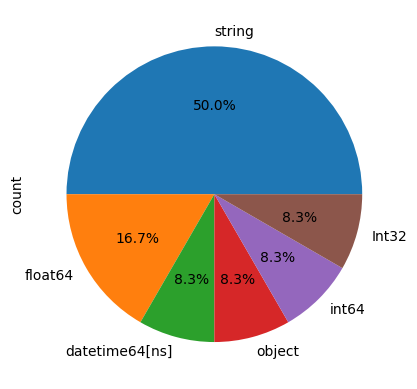

In [340]:
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%')

In [341]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values_df = missing_values[missing_values > len(df) * 0.15]
print(f"Colonne avec des valeurs manquantes : \n{missing_values}")
print(f"Colonne avec des valeurs manquantes : \n{missing_values_df}")
# df.drop(missing_values_df[missing_values_df > len(df) * 0.95].index, axis=1, inplace=True)

Colonne avec des valeurs manquantes : 
Code_postal      16166
Type_local     1318331
Surface_bat    1320073
Nb_pieces      1320073
dtype: int64
Colonne avec des valeurs manquantes : 
Type_local     1318331
Surface_bat    1320073
Nb_pieces      1320073
dtype: int64


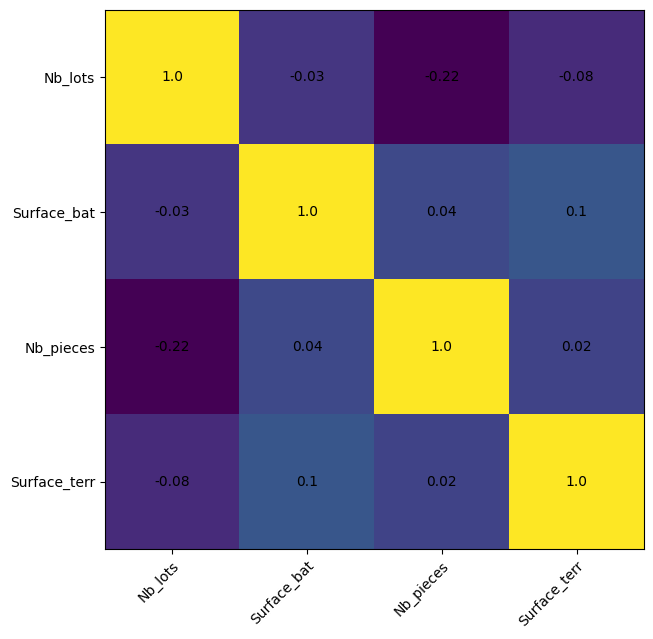

In [342]:
# Sel col numriques
df_num = df.select_dtypes(include=["float64", "int64", "int32"])

# Coefficient de corrélation
correlation = df_num.corr()

# Heatmap
fig, ax = plt.subplots(figsize=(10, 7))
im = ax.imshow(correlation.values)

# Etiquettes des colonnes
ax.set_xticks(np.arange(len(correlation.columns)))
ax.set_yticks(np.arange(len(correlation.columns)))
ax.set_xticklabels(correlation.columns)
ax.set_yticklabels(correlation.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotations
for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        text = ax.text(j, i, np.round(correlation.iloc[i, j], 2), ha="center", va="center", color="black")

plt.show()